In [ ]:
!pip install yfinance


In [ ]:
# Step 1: Install yfinance
!pip install yfinance

# Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd

# Step 3: Download AAPL stock data from Yahoo Finance (last 5 years)
df = yf.download('AAPL', start='2020-04-01', end='2025-04-01')

# Step 4: Reset index so 'Date' becomes a column
df.reset_index(inplace=True)

# Step 5: Display first few rows
print("✅ AAPL Stock Data (5 Years):")
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

✅ AAPL Stock Data (5 Years):


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-04-01,58.463810,60.359133,58.031842,59.820385,176218400
1,2020-04-02,59.439369,59.492759,57.490657,58.325473,165934000
2,2020-04-03,58.585144,59.626235,57.993007,58.922468,129880000
3,2020-04-06,63.695969,63.851279,60.519301,60.888170,201820400
4,2020-04-07,62.958214,65.935890,62.853864,65.717473,202887200


In [ ]:
# Save to CSV file (optional)
df.to_csv('AAPL_5Y_data.csv', index=False)


         Date               Close               High                 Low  \
0         NaN                AAPL               AAPL                AAPL   
1  2020-04-01  58.463809967041016   60.3591327272743  58.031841560613465   
2  2020-04-02  59.439369201660156  59.49275888105111   57.49065701285396   
3  2020-04-03   58.58514404296875  59.62623542608821   57.99300663222972   
4  2020-04-06   63.69596862792969  63.85127936413574   60.51930084799207   

                Open     Volume  
0               AAPL       AAPL  
1  59.82038494793416  176218400  
2  58.32547341461665  165934000  
3  58.92246773803886  129880000  
4  60.88817032671101  201820400  


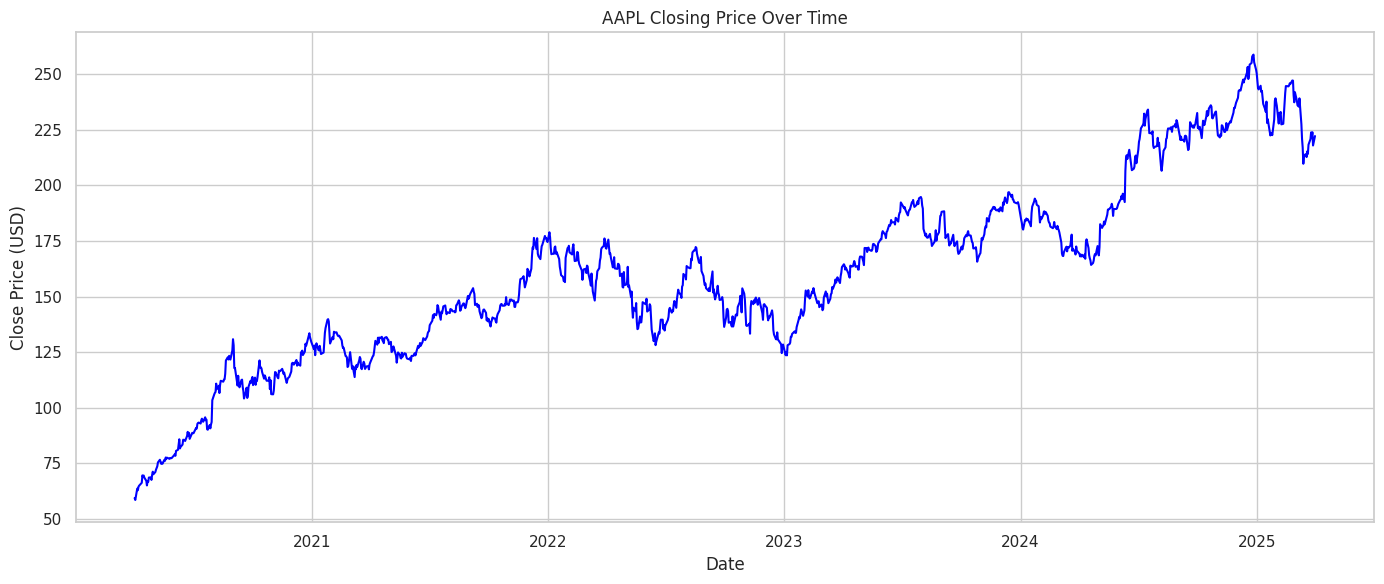

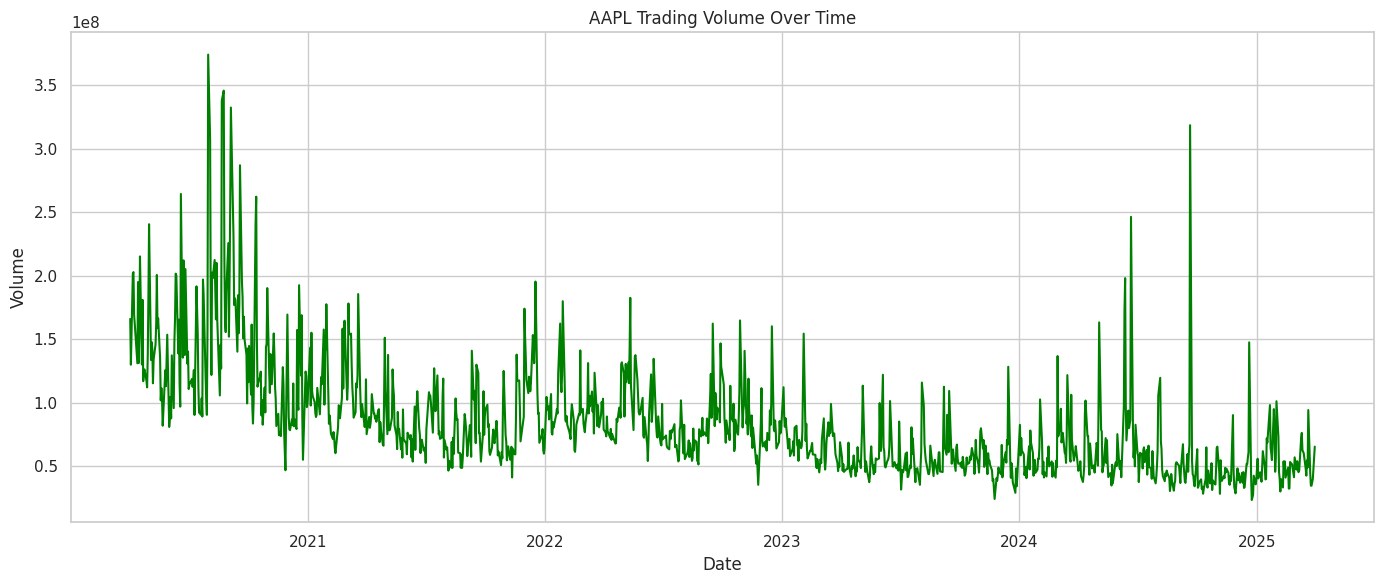

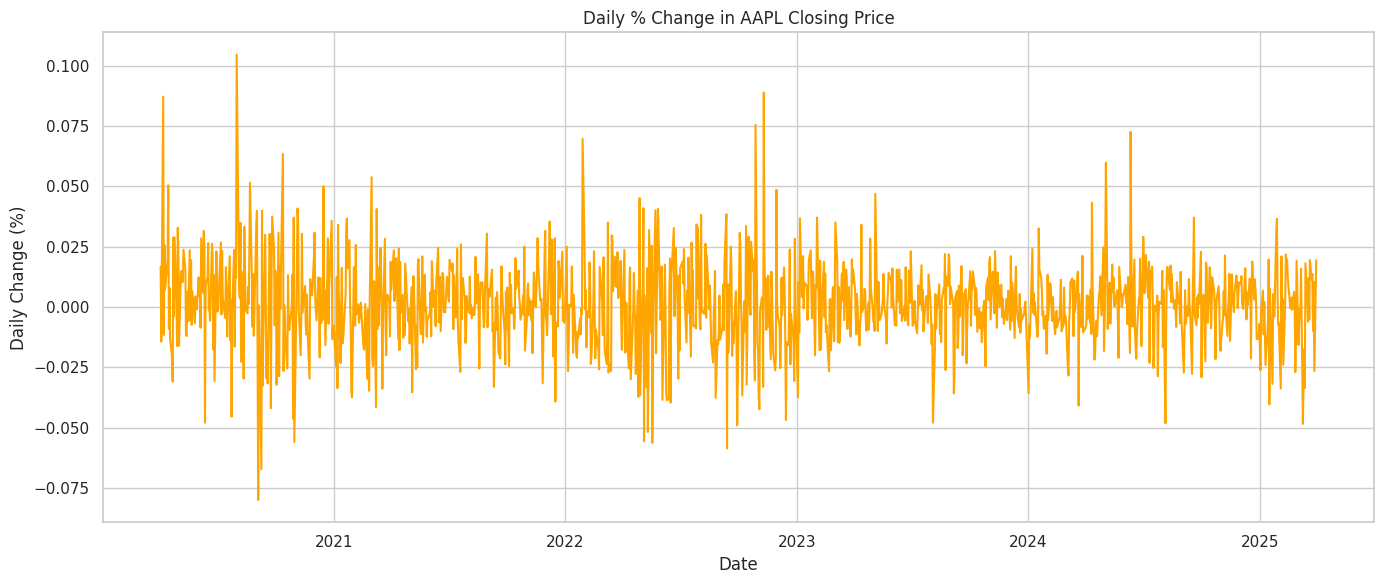

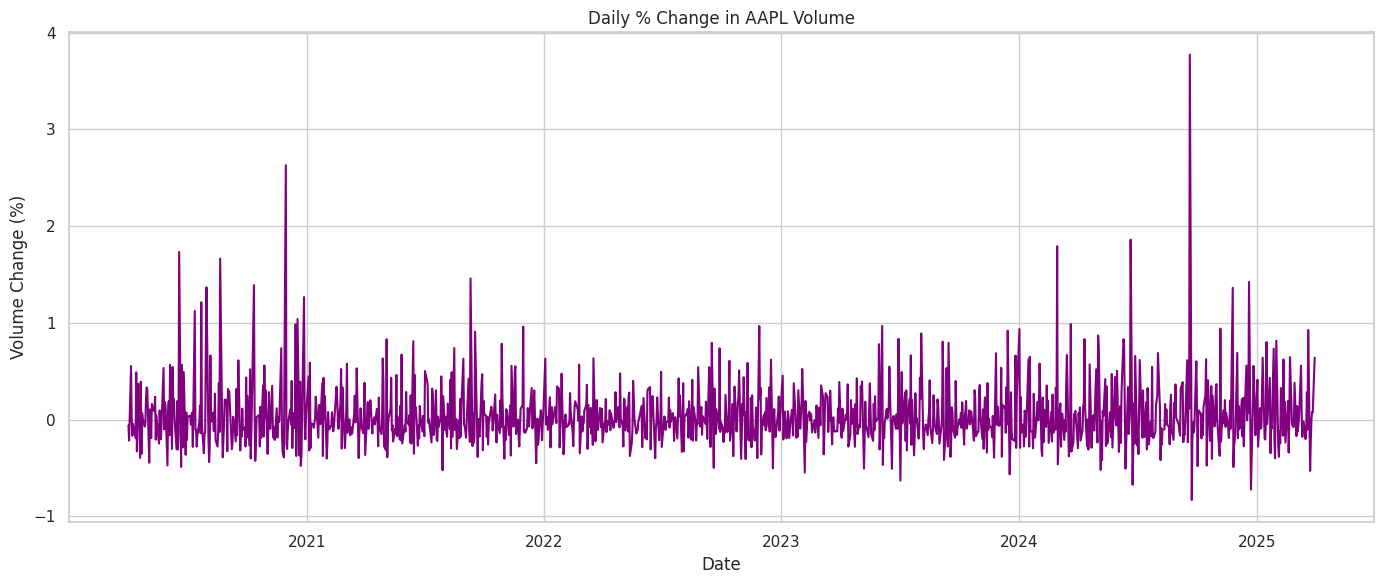

In [ ]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the CSV file
file_path = '/content/AAPL_5Y_data.csv'
df = pd.read_csv(file_path)

# ✅ Preview the top rows
print(df.head())

# ✅ Clean data: remove rows where 'Close' or 'Volume' are not numeric
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Volume'], errors='coerce').notnull()]

# ✅ Convert types properly
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# ✅ Feature Engineering
df['Daily_Change'] = df['Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()
df.dropna(inplace=True)

# ✅ Set Seaborn style
sns.set(style='whitegrid')

# ✅ Plot 1: Closing Price Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Close'], color='blue')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.tight_layout()
plt.show()

# ✅ Plot 2: Trading Volume Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Volume'], color='green')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

# ✅ Plot 3: Daily % Change in Price
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Daily_Change'], color='orange')
plt.title('Daily % Change in AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.tight_layout()
plt.show()

# ✅ Plot 4: Daily % Change in Volume
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['Date'], y=df['Volume_Change'], color='purple')
plt.title('Daily % Change in AAPL Volume')
plt.xlabel('Date')
plt.ylabel('Volume Change (%)')
plt.tight_layout()
plt.show()


Mean Squared Error: 11.640673034731929
R² Score: 0.9772850427986197
          Actual   Predicted
1005  169.230927  170.632682
1006  168.046509  169.254615
1007  168.852692  168.062112
1008  168.026627  168.835758
1009  168.783020  168.024710


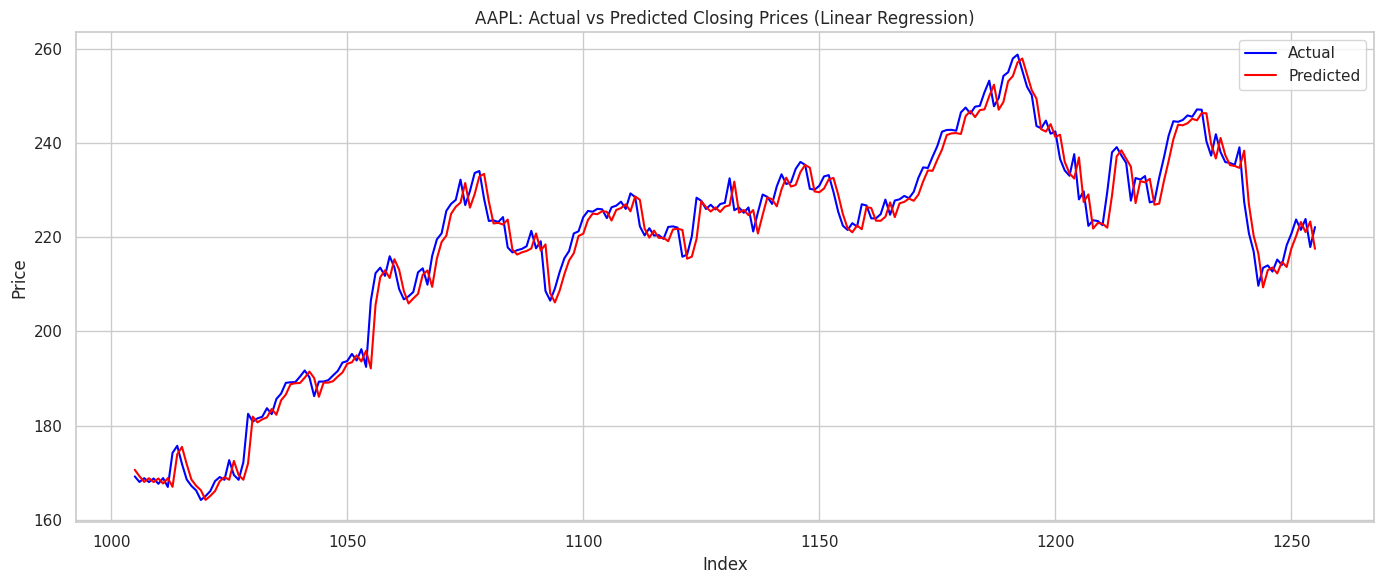

In [ ]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ Load and Clean Data Again (if needed)
df = pd.read_csv('/content/AAPL_5Y_data.csv')
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['Volume'], errors='coerce').notnull()]
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df['Daily_Change'] = df['Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()
df.dropna(inplace=True)

# ✅ Lag Feature: Predict next day’s Close using current day's data
df['Close_Next'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# ✅ Features and Target
features = ['Close', 'Volume', 'Daily_Change', 'Volume_Change']
target = 'Close_Next'

X = df[features]
y = df[target]

# ✅ Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = model.predict(X_test)

# ✅ Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# ✅ Display actual vs predicted in a DataFrame
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}, index=y_test.index)
print(results.head())

# ✅ Optional: Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='red')
plt.title('AAPL: Actual vs Predicted Closing Prices (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 📦 Libraries
import numpy as np

# ✅ Simulate sentiment scores (range: -1 to 1) for demo
np.random.seed(42)
df['Sentiment'] = np.random.normal(loc=0, scale=0.3, size=len(df))  # Simulated sentiment values

# ✅ Clip scores to stay between -1 and 1
df['Sentiment'] = df['Sentiment'].clip(-1, 1)

# ✅ Add lagged sentiment score if needed
df['Sentiment_Lag'] = df['Sentiment'].shift(1)
df.dropna(inplace=True)

# ✅ Update features
features = ['Close', 'Volume', 'Daily_Change', 'Volume_Change', 'Sentiment', 'Sentiment_Lag']
target = 'Close_Next'

X = df[features]
y = df[target]

# ✅ Split data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# ✅ Retrain with new features
model_sentiment = LinearRegression()
model_sentiment.fit(X_train, y_train)

# ✅ Predict and Evaluate
y_pred_sentiment = model_sentiment.predict(X_test)

mse_sent = mean_squared_error(y_test, y_pred_sentiment)
r2_sent = r2_score(y_test, y_pred_sentiment)

print("🔹 With Sentiment - MSE:", mse_sent)
print("🔹 With Sentiment - R² Score:", r2_sent)

# ✅ Results DataFrame
results_sent = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_sentiment}, index=y_test.index)


🔹 With Sentiment - MSE: 11.653770160196771
🔹 With Sentiment - R² Score: 0.9772594858017427


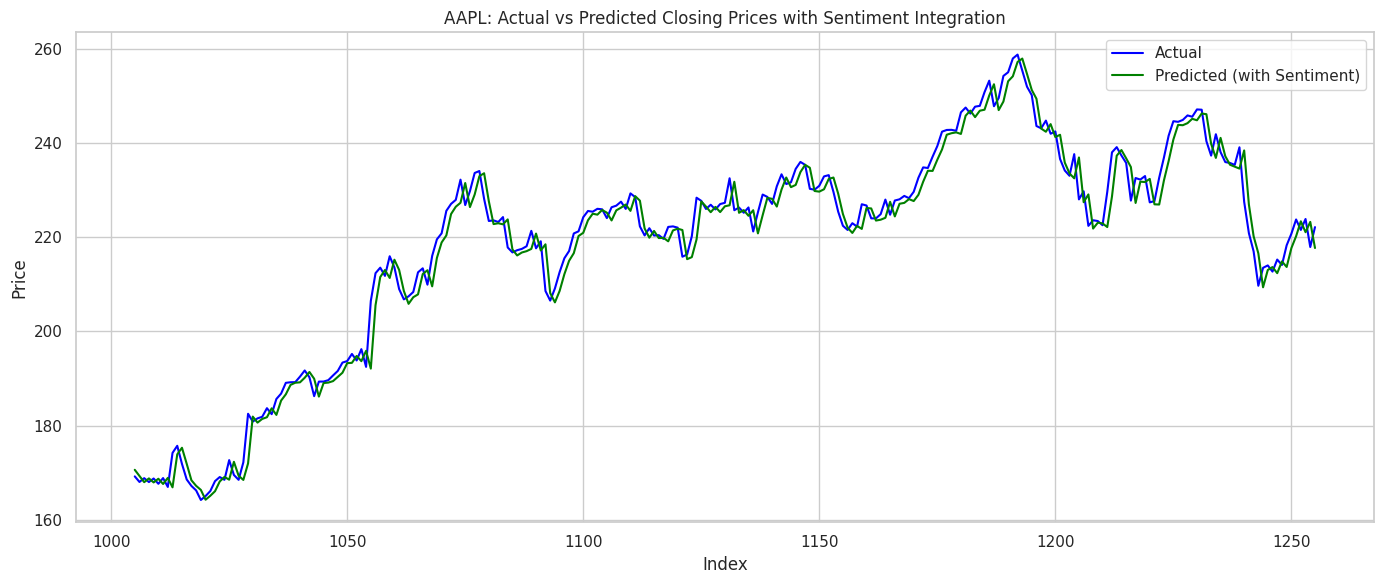

In [ ]:
# 📊 Visualization
plt.figure(figsize=(14, 6))
plt.plot(results_sent.index, results_sent['Actual'], label='Actual', color='blue')
plt.plot(results_sent.index, results_sent['Predicted'], label='Predicted (with Sentiment)', color='green')
plt.title('AAPL: Actual vs Predicted Closing Prices with Sentiment Integration')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


🌲 Random Forest - MSE: 1003.2443580033989
🌲 Random Forest - R² Score: -0.9576748343140962


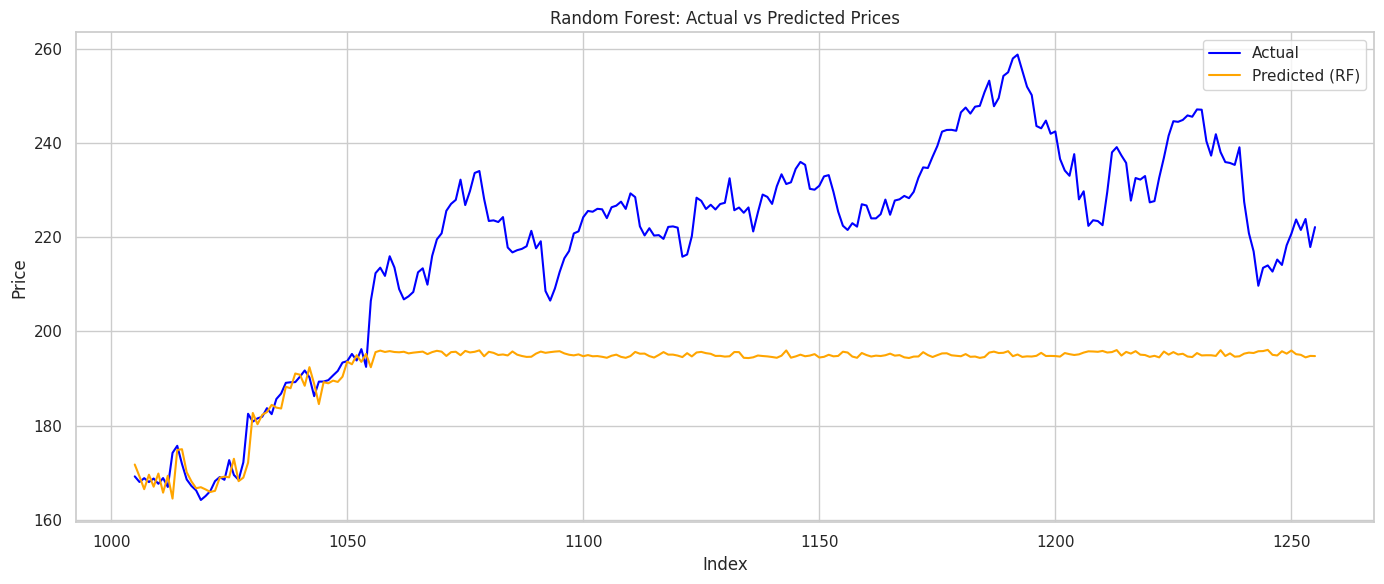

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 🎯 Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest - MSE:", mse_rf)
print("🌲 Random Forest - R² Score:", r2_rf)

# 📊 Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted (RF)', color='orange')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 🧼 Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + ['Close_Next']])

# 🧠 Create sequences for LSTM
def create_lstm_dataset(data, time_step=10):
    X_lstm, y_lstm = [], []
    for i in range(time_step, len(data)):
        X_lstm.append(data[i-time_step:i, :-1])
        y_lstm.append(data[i, -1])
    return np.array(X_lstm), np.array(y_lstm)

time_step = 10
X_lstm, y_lstm = create_lstm_dataset(scaled_data, time_step)

# Split
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 📐 Define model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 🏋️ Train model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0522
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.9146e-04
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.2686e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.3111e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.3809e-04
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.9068e-04
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7106e-04


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0643 - val_loss: 0.0274
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0016 - val_loss: 0.0121
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.3543e-04 - val_loss: 0.0075
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.9768e-04 - val_loss: 0.0068
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.2667e-04 - val_loss: 0.0053
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.9724e-04 - val_loss: 0.0053
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.1007e-04 - val_loss: 0.0045
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.3064e-04 - val_loss: 0.0035
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.5132e-04 - val_loss: 0.0040
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.0450e-04 - val_loss: 0.0041
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6.9849e-04 - val_loss: 0.0023
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━

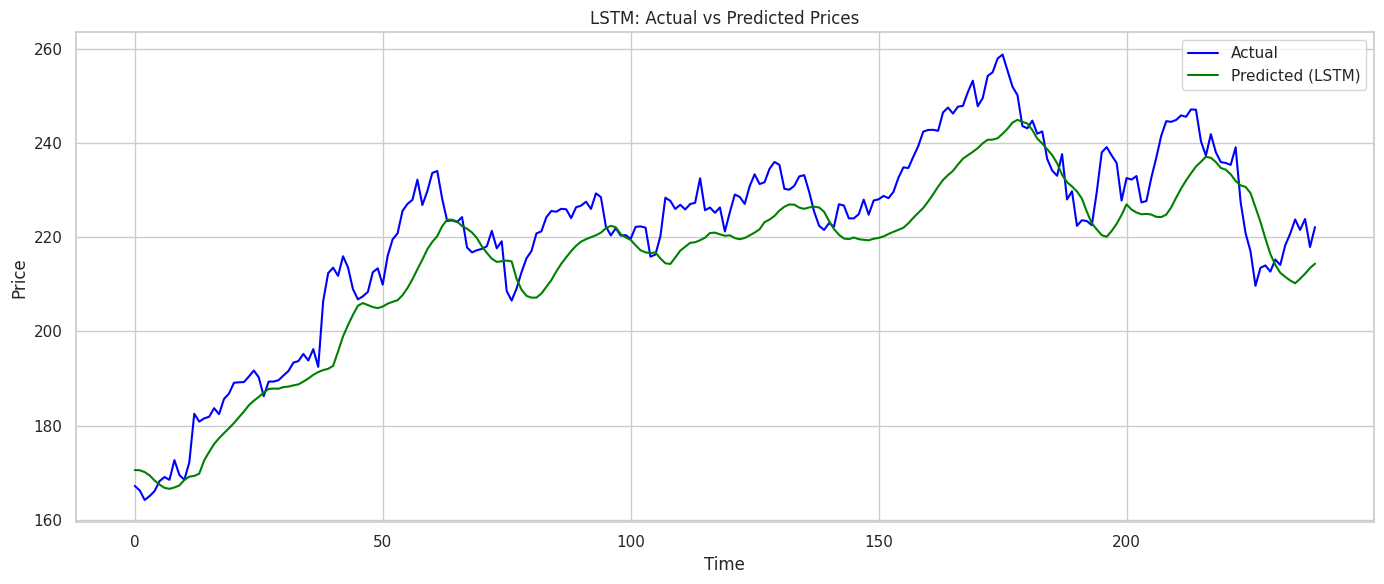

Mean Squared Error (MSE): 83.44869146561709


TypeError: 'History' object is not subscriptable

<Figure size 1400x600 with 0 Axes>

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
df = pd.read_csv('/content/AAPL_5Y_data.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as index
df.set_index('Date', inplace=True)

# Data cleaning: Remove rows with non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric values, coerce non-numeric to NaN
df = df.dropna()  # Drop rows with NaN values

# Feature Engineering: Create new column for next day's close price
df['Close_Next'] = df['Close'].shift(-1)
df = df.dropna()

# Selecting features for LSTM model
features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Exclude Close_Next
df_features = df[features]
df_target = df['Close_Next']

# Normalize the features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features and target
scaled_features = feature_scaler.fit_transform(df_features)
scaled_target = target_scaler.fit_transform(df_target.values.reshape(-1, 1))

# Combine scaled features and target
scaled_data = np.concatenate((scaled_features, scaled_target), axis=1)

# LSTM dataset creation function
def create_lstm_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, :-1])  # All features except target
        y.append(data[i, -1])  # Target (Close_Next)
    return np.array(X), np.array(y)

# Time step for LSTM (number of previous days used for prediction)
time_step = 60

# Create LSTM dataset
X, y = create_lstm_dataset(scaled_data, time_step)

# Split dataset into train and test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(units=1))  # Predicting the next day's closing price

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_lstm_rescaled = target_scaler.inverse_transform(y_pred_lstm)
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_lstm_rescaled, label='Predicted (LSTM)', color='green')
plt.title('LSTM: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test_rescaled, y_pred_lstm_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Optional: Plot the training loss and validation loss during training
history = model_lstm.history
plt.figure(figsize=(14, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Plot feature importance (optional, if you'd like to analyze)
feature_importance = model_lstm.layers[0].get_weights()[0]
plt.figure(figsize=(14, 6))
plt.bar(df_features.columns, np.mean(feature_importance, axis=1))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


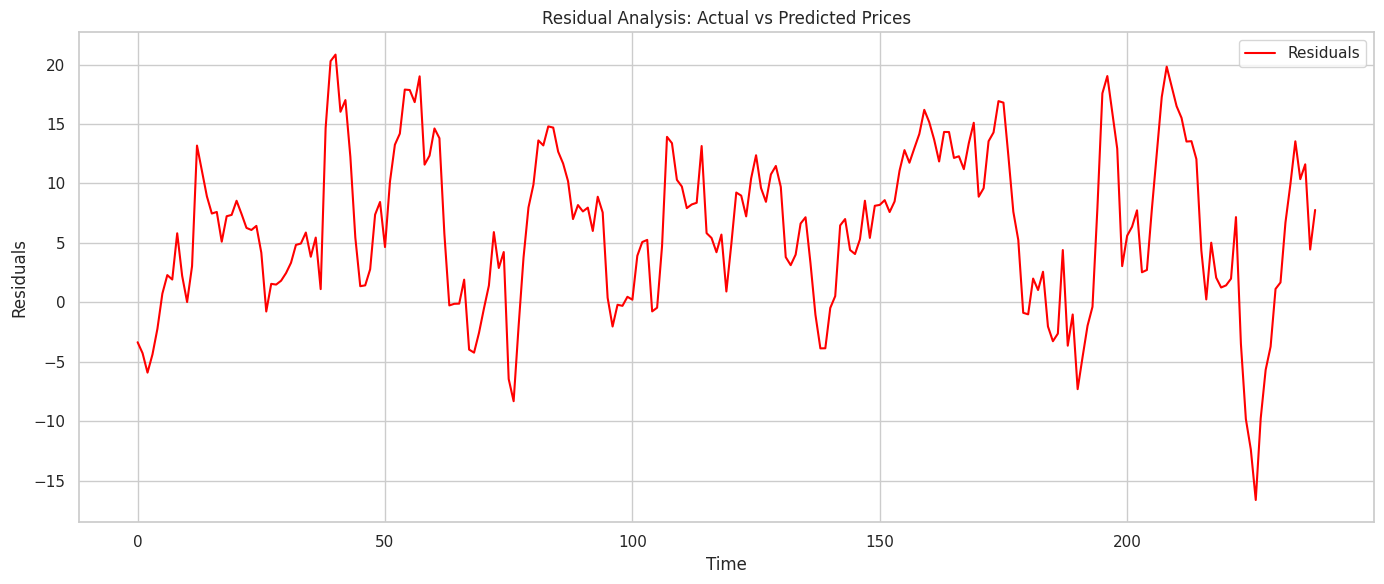

In [20]:
# Calculate residuals (errors) between actual and predicted prices
residuals = y_test_rescaled - y_pred_lstm_rescaled

# Plot residuals
plt.figure(figsize=(14, 6))
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residual Analysis: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

# Check for any patterns in the residuals (they should ideally be random)
